<a href="https://colab.research.google.com/github/hyunlimy/SNUCM_medical_datascience/blob/main/%5Bopen%5D_04_svpred_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의료데이터 사이언스의 이해와 실습
## 생체신호 데이터 활용 (2) <br> Stroke volume prediction using arterial wave - model building
- Author : **Hyun-Lim Yang, Ph.D.**<br>
Research Assistant Professor @
Seoul National University Hospital <br>
Department of Anesthesiology and Pain Medicine
- E-mail : hlyang{_at_}snu{_dot_}ac{_dot_}kr
***

In [ ]:
from IPython.display import HTML
style_warn = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style_warn)

### Import packages

<div class="warn">**Warning!** : use your directory at `download_directory`</div>


> **Wargning** <br>
> colab 환경을 위한 google drive import 코드가 포함되어 있습니다. <br>
> 로컬 환경에서 실행 시 colab을 위한 import function들을 comment out 한 뒤 실행하세요. 

In [ ]:
from google.colab import drive  # for colab
drive.mount('/content/gdrive/')  # for colab

In [ ]:
import os
cloud_directory = '/content/gdrive/My Drive/SNUCM_medical_datascience/'
os.listdir(cloud_directory) # for colab, check cloud directory mount

In [ ]:
import sys
download_directory = os.getcwd() # for local environments
sys.path.append(download_directory) # for local environments
sys.path.append(cloud_directory) # for colab

In [ ]:
!pip install gcsfs
import gcsfs

In [ ]:
import numpy as np
import pandas as pd
import keras
import glob
import kohi_preprocessor as pre
from tqdm import tqdm
import warnings
import pickle
warnings.filterwarnings(action='ignore')

download_directory = cloud_directory # for colab

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

### Data loading
사전에 구축된 데이터셋 로드

In [ ]:
with open('{}/data/svpred_alines_20sec.np'.format(download_directory), 'rb') as f:
    aline_data = pickle.load(f)
    
with open('{}/data/svpred_ylabels_20sec.np'.format(download_directory), 'rb') as f:
    ylabel_data = pickle.load(f)
    
with open('{}/data/svpred_charts_20sec.np'.format(download_directory), 'rb') as f:
    charts_data = pickle.load(f)
    

### Train data와 Valid 데이터로 데이터 구분
편의를 위해 여기선 **180번** 차트 이후의 데이터를 모두 testset으로 구분

In [ ]:

### =========== Your code here ====================

test_index = 
train_index = 

aline_train = 
ylabel_train = 
charts_train = 

aline_test = 
ylabel_test = 
charts_test = 

### ===============================================


### Model building에 필요한 패키지 불러오기

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, concatenate, multiply, dot
from keras.layers import Layer, Dense, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Add, ReLU, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from keras import metrics

### CNN 모델 정의
실습에 사용될 CNN 구조

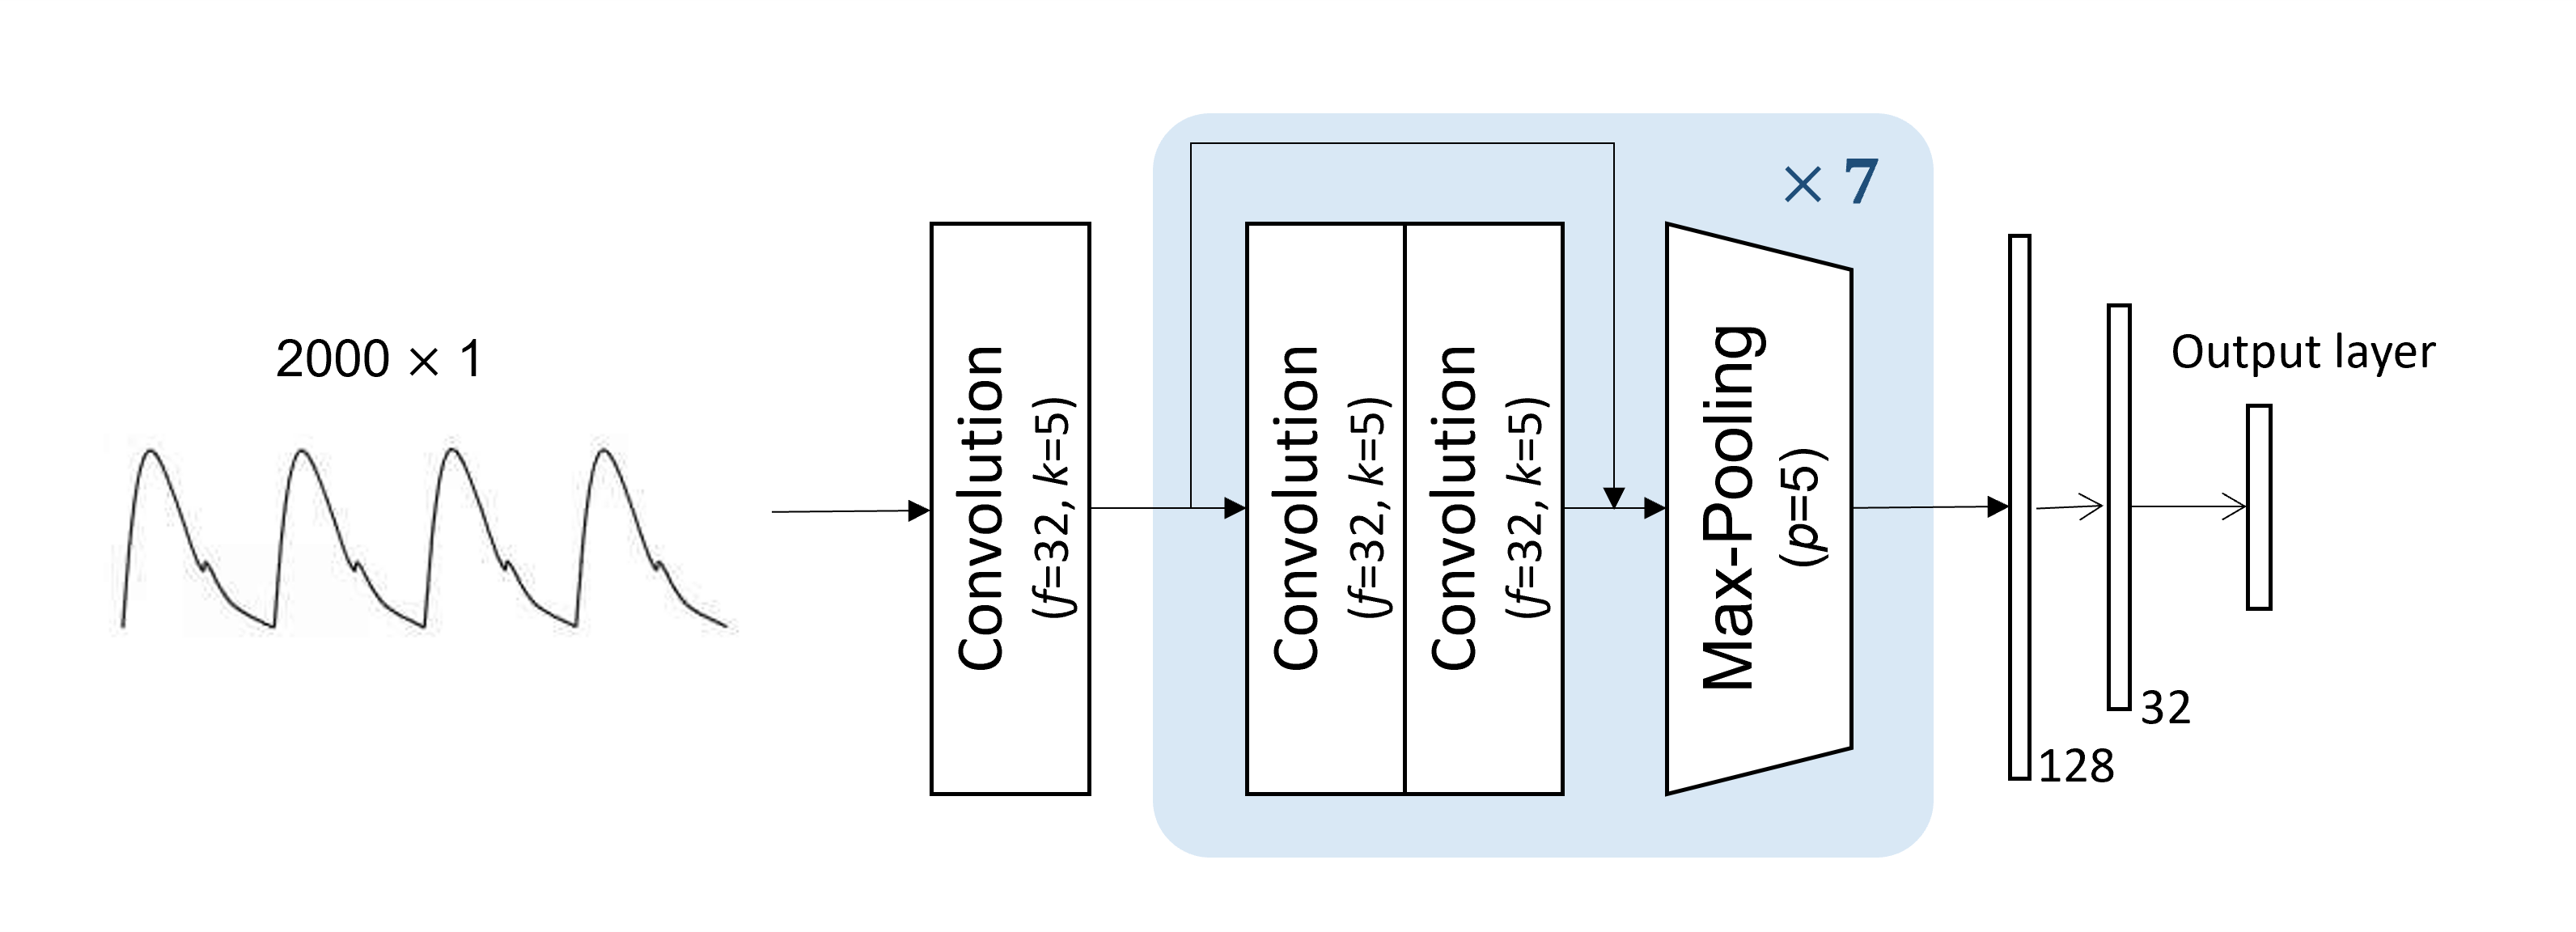

In [ ]:
from IPython.display import Image
Image(filename="{}/kohi_CNN_model_archi.png".format(download_directory))

Keras를 이용한 CNN 구현 코드 (Regression problem)

In [ ]:
batch_size = 2000

inp = Input(shape=(aline_train.shape[1], 1))

#stem
x = Conv1D(filters=32, kernel_size=5, activation='relu')(inp)

# block 1
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(x)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([x, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# block 2
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(out)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([out, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# block 3
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(out)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([out, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# block 4
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(out)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([out, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# block 5
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(out)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([out, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# block 6
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(out)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([out, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# block 7
fx = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(out)
fx = Conv1D(filters=32, kernel_size=5, padding='same')(fx)
out = Add()([out, fx])
out = ReLU()(out)
out = MaxPooling1D(pool_size=5, strides=2)(out)

# regression을 수행할 수 있는 MLP layer 정의
# Two dense layer with 128 and 32 nodes
### =========== Your code here ====================

# MLP Layers
out = 
out = 
out = 
out = 

### ===============================================

simple cnn model compile <br>
loss는 `mse` (mean squred error) 를 사용, metric은 `mae` (mean absolute error) 와 `mse` (mean squred error)를 사용 

In [ ]:
# 모델의 input과 output pipeline 정의
# 모델 컴파일 
### =========== Your code here ====================

simple_cnn_model = 
adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001)
simple_cnn_model.compile( ## your code here ## )

### ===============================================

In [ ]:
simple_cnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1996, 32)     192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1996, 32)     5152        conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1996, 32)     5152        conv1d_1[0][0]                   
______________________________________________________________________________________________

### 모델 학습 파라미터 정의 및 학습 수행
`cache_path`: 모델이 저장될 경로 지정 <br>
`callback_functions`: 모델 학습에 사용되는 파라미터 설정 <br>

In [ ]:
cache_path = os.path.join(download_directory, "simple_cnn_weight_sv.h5")
callback_functions = [ModelCheckpoint(monitor='val_loss', filepath=cache_path, verbose=1, save_best_only=True),
                      EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
                      ]

In [ ]:
# 모델 학습 수행
### =========== Your code here ====================

simple_cnn_train_history = simple_cnn_model.fit( ## your code here ## )

### ===============================================

Epoch 1/10
41/41 [==============================] - 12s 197ms/step - loss: 2065.5278 - mae: 32.0545 - mse: 2065.5278 - val_loss: 1051.6481 - val_mae: 27.2272 - val_mse: 1051.6481

Epoch 00001: val_loss improved from inf to 1051.64807, saving model to /home/lims1/python/KOHIadvance2021/simple_cnn_weight_sv.h5
Epoch 2/10
41/41 [==============================] - 7s 167ms/step - loss: 653.3456 - mae: 20.4001 - mse: 653.3456 - val_loss: 853.2153 - val_mae: 24.1920 - val_mse: 853.2153

Epoch 00002: val_loss improved from 1051.64807 to 853.21527, saving model to /home/lims1/python/KOHIadvance2021/simple_cnn_weight_sv.h5
Epoch 3/10
41/41 [==============================] - 7s 168ms/step - loss: 616.3102 - mae: 19.8648 - mse: 616.3102 - val_loss: 852.8721 - val_mae: 24.2886 - val_mse: 852.8721

Epoch 00003: val_loss improved from 853.21527 to 852.87213, saving model to /home/lims1/python/KOHIadvance2021/simple_cnn_weight_sv.h5
Epoch 4/10
41/41 [==============================] - 7s 168ms/step - l

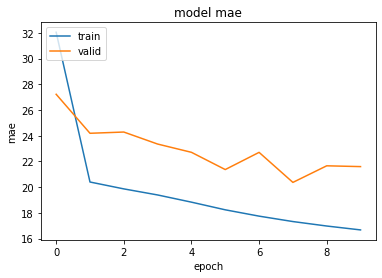

In [ ]:
# 모델의 mae loss plotting
### =========== Your code here ====================

plt.plot( # your code here # )
plt.plot( # your code here # )
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

### ===============================================

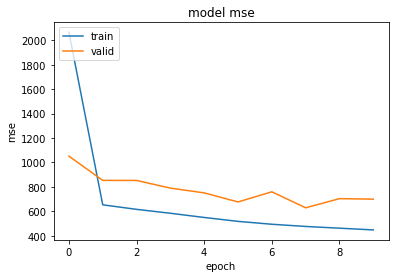

In [ ]:
# 모델의 mse loss plotting
### =========== Your code here ====================

plt.plot( # your code here # )
plt.plot( # your code here # )
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

### ===============================================

In [ ]:
simple_cnn_model.load_weights(cache_path)
simple_cnn_result = simple_cnn_model.predict(aline_test).flatten()

In [ ]:
simple_cnn_result

array([76.88368, 70.39553, 72.64447, ..., 72.99619, 73.39334, 77.06195],
      dtype=float32)

In [ ]:
ylabel_test

array([60., 59., 60., ..., 81., 79., 80.])

### 학습된 모델 Visialization
> 주황색이 우리 모델의 예측값이고, 파란색의 정답 입니다.

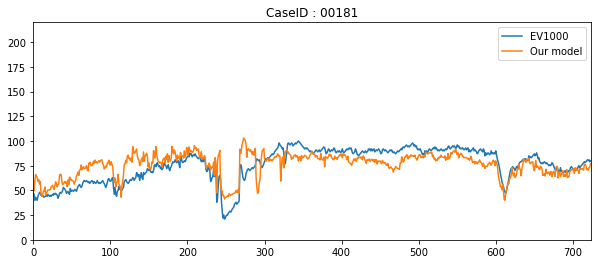

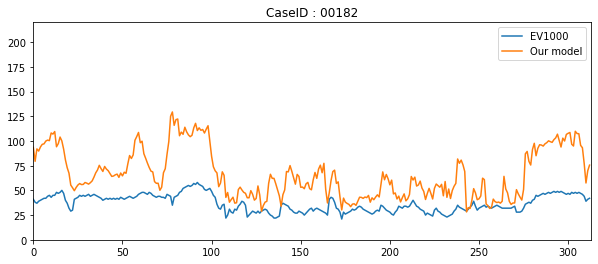

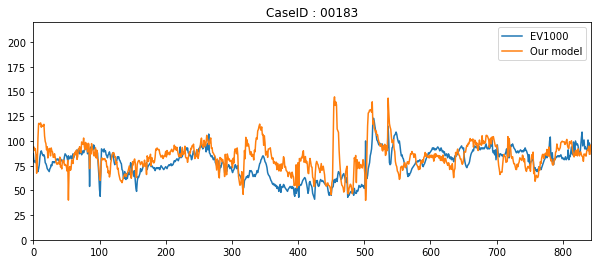

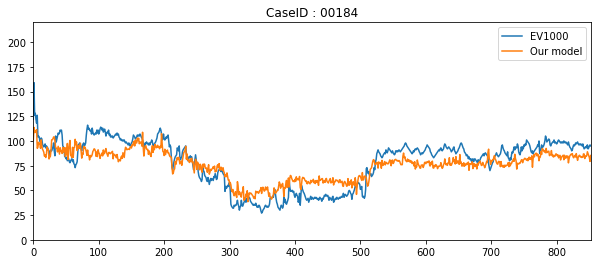

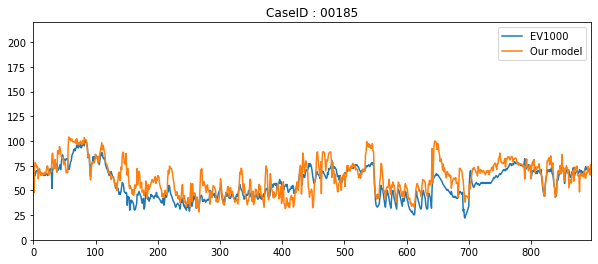

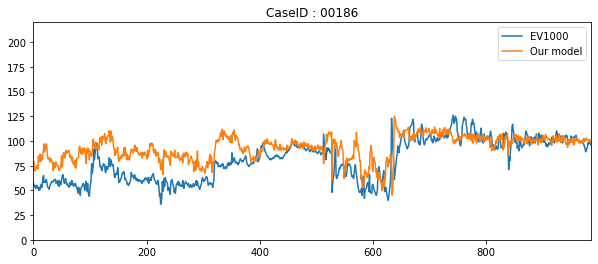

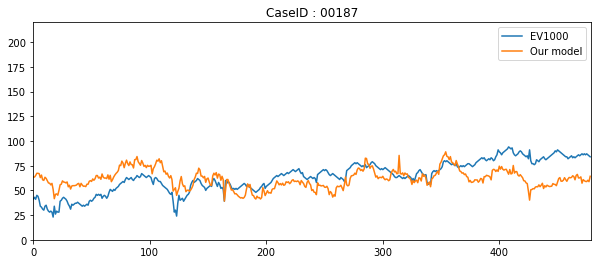

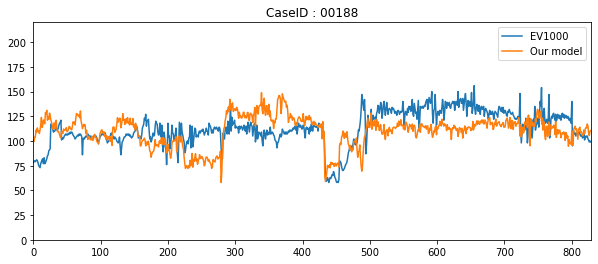

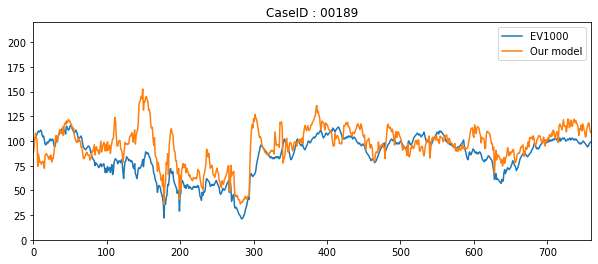

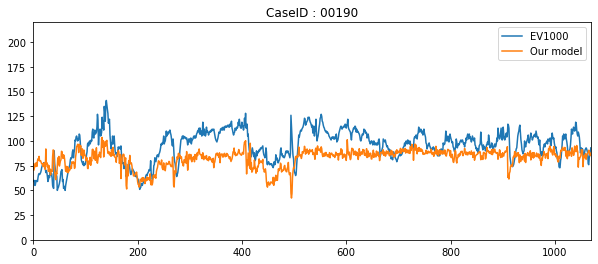

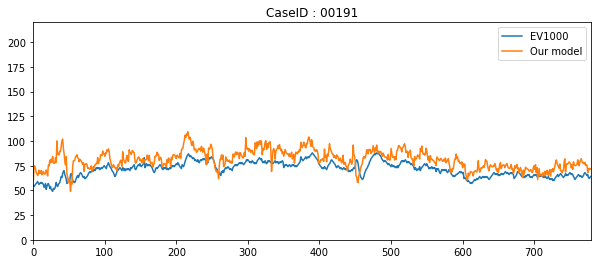

In [ ]:
for chart in np.unique(charts_test):
    case_output = simple_cnn_result[charts_test == chart]
    case_target = ylabel_test[charts_test == chart]
    plt.figure(figsize=(10, 4))
    plt.xlim([0, len(case_output)])
    plt.ylim([0, 220])
    plt.plot(np.arange(0, len(case_target)), case_target,
             label='EV1000')
    plt.plot(np.arange(0, len(case_output)), case_output,
             label='Our model')
    plt.legend(loc='upper right')
    # plt.text(0.5, 145, loa_textstr, fontsize=10)
    plt.title('CaseID : {}'.format(chart))
    plt.show()

## Transfer learning
딥러닝 모델은 초기화 방법에 따라 모델의 성능이 크게 달라질 수 있습니다.<br>
앞선 시간의 low blood pressure 모델을 불러와 transfer learning 을 수행해 보고 결과를 비교합니다.

In [ ]:
lowbp_model = keras.models.load_model(os.path.join(download_directory, "new_cnn_weight_balanced.h5"))

In [ ]:
lowbp_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1996, 32)     192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1996, 32)     5152        conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1996, 32)     5152        conv1d_1[0][0]                   
___________________________________________________________________________________________

불러온 lowbp 모델에서, MLP 파트는 제외하고 convolution part만 따로 떼어내서 `base_model`로 정의합니다.

In [ ]:
base_model = Model(lowbp_model.input, lowbp_model.layers[-4].output)

In [ ]:
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1996, 32)     192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1996, 32)     5152        conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1996, 32)     5152        conv1d_1[0][0]                   
____________________________________________________________________________________________

transfer learning 모델을 정의합니다.<br>
`base_model`의 모델 구조와 파라미터를 그대로 가져와서 MLP layer에 해당되는 부분만 추가하고 학습을 진행합니다.


In [ ]:
inp_transfer = Input(shape=(aline_train.shape[1], 1))

x = base_model(inp_transfer, training=False)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
out_transfer = Dense(1)(x)

In [ ]:
transfer_model = Model(inputs=[inp_transfer], outputs=[out_transfer])
adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001)
transfer_model.compile(loss='mse', optimizer=adam_optimizer, metrics=['mae', 'mse'])

In [ ]:
transfer_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2000, 1)]         0         
_________________________________________________________________
model_1 (Functional)         (None, 384)               72320     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 125,761
Trainable params: 125,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cache_path_transfer = os.path.join(download_directory, "simple_cnn_weight_sv_transfer.h5")
callback_functions_transfer = [ModelCheckpoint(monitor='val_loss', filepath=cache_path_transfer, verbose=1, save_best_only=True),
                      EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
                      ]

In [ ]:
transfer_model_train_history = transfer_model.fit(aline_train, ylabel_train, epochs = 10, 
                                                batch_size=batch_size, verbose=1, validation_split=0.2,
                                               callbacks=callback_functions_transfer)

Epoch 1/10
41/41 [==============================] - 9s 179ms/step - loss: 1278.1672 - mae: 26.9903 - mse: 1278.1672 - val_loss: 693.4733 - val_mae: 21.5929 - val_mse: 693.4733

Epoch 00001: val_loss improved from inf to 693.47333, saving model to /home/lims1/python/KOHIadvance2021/simple_cnn_weight_sv_transfer.h5
Epoch 2/10
41/41 [==============================] - 7s 166ms/step - loss: 546.2588 - mae: 18.7616 - mse: 546.2588 - val_loss: 760.5087 - val_mae: 22.9939 - val_mse: 760.5087

Epoch 00002: val_loss did not improve from 693.47333
Epoch 3/10
41/41 [==============================] - 7s 167ms/step - loss: 453.2241 - mae: 16.7720 - mse: 453.2241 - val_loss: 492.0086 - val_mae: 18.0098 - val_mse: 492.0086

Epoch 00003: val_loss improved from 693.47333 to 492.00858, saving model to /home/lims1/python/KOHIadvance2021/simple_cnn_weight_sv_transfer.h5
Epoch 4/10
41/41 [==============================] - 7s 167ms/step - loss: 387.7663 - mae: 15.2810 - mse: 387.7663 - val_loss: 577.3024 - v

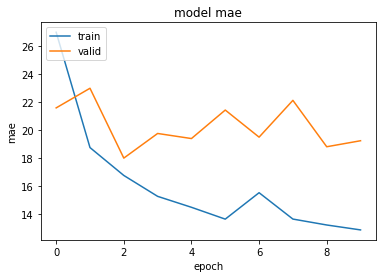

In [ ]:
plt.plot(transfer_model_train_history.history['mae'])
plt.plot(transfer_model_train_history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

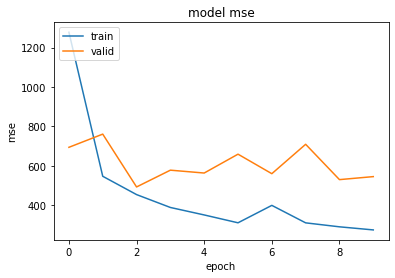

In [ ]:
plt.plot(transfer_model_train_history.history['mse'])
plt.plot(transfer_model_train_history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

모델 결과 추론

In [ ]:
transfer_model.load_weights(cache_path_transfer)
transfer_model_result = transfer_model.predict(aline_test).flatten()

In [ ]:
transfer_model_result

array([70.46758, 67.13253, 66.08991, ..., 78.38259, 75.99427, 80.49481],
      dtype=float32)

In [ ]:
ylabel_test

array([60., 59., 60., ..., 81., 79., 80.])

In [ ]:
def MSE(y, pred):
    return np.mean(np.square(y-pred))

def MAE(y, pred):
    return np.mean(np.abs(y-pred))

In [ ]:
print('MSE from scratch: {:.3f}'.format(MSE(ylabel_test, simple_cnn_result)))
print('MSE from transfer: {:.3f}'.format(MSE(ylabel_test, transfer_model_result)))
print('\n')
print('MAE from scratch: {:.3f}'.format(MAE(ylabel_test, simple_cnn_result)))
print('MAE from transfer: {:.3f}'.format(MAE(ylabel_test, transfer_model_result)))

MSE from scratch: 299.273
MSE from transfer: 249.275


MAE from scratch: 13.617
MAE from transfer: 12.255


### 학습된 모델 Visialization
> 주황색이 from scratch 모델의 예측값이고, 초록색이 transfer model의 예측값, 파란색의 정답 입니다.

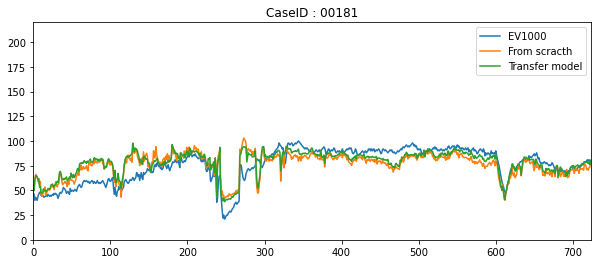

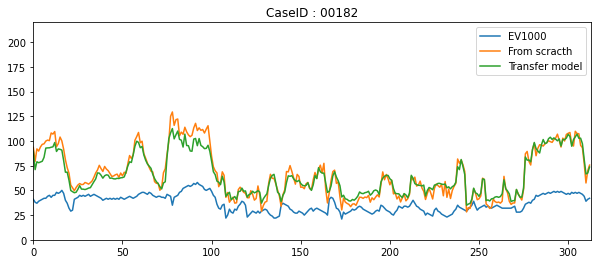

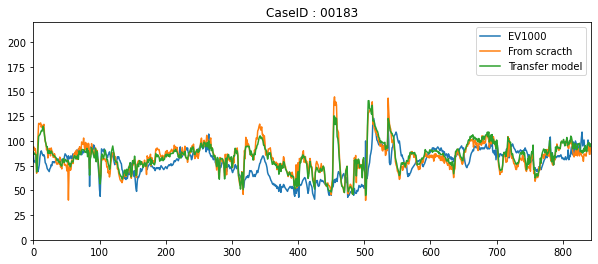

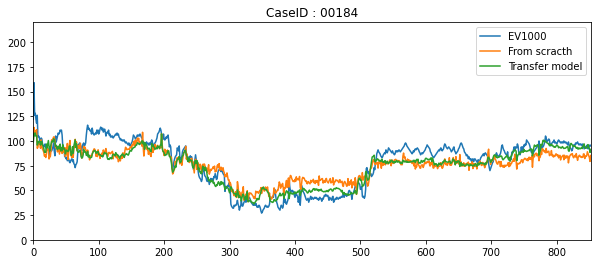

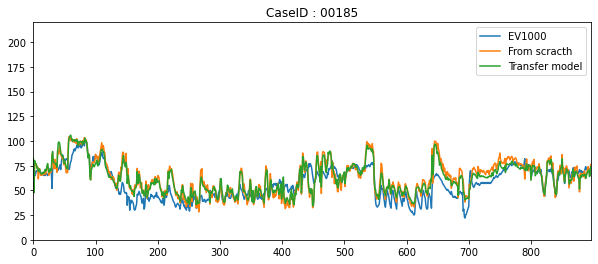

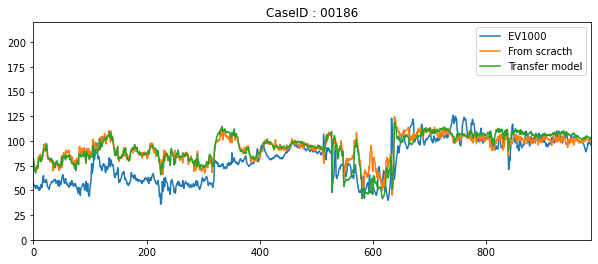

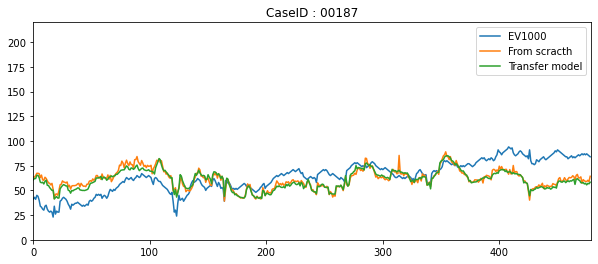

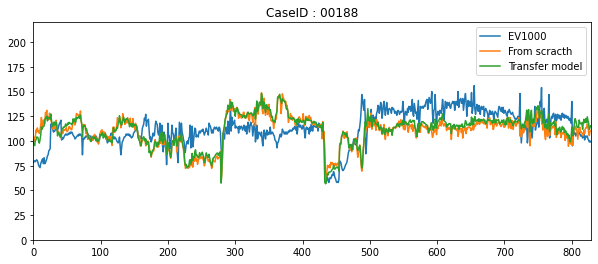

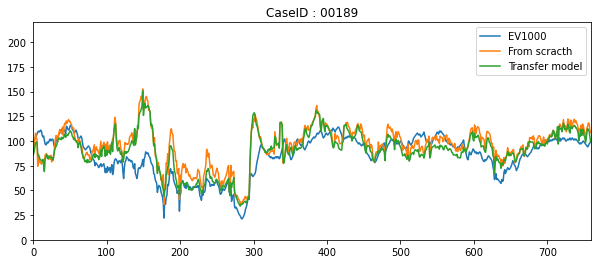

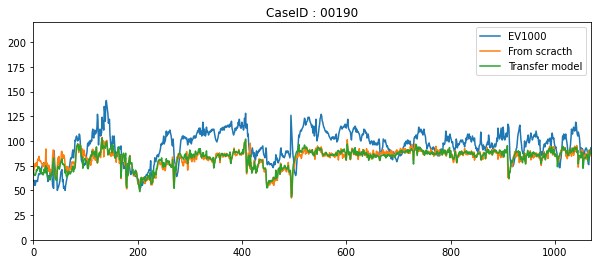

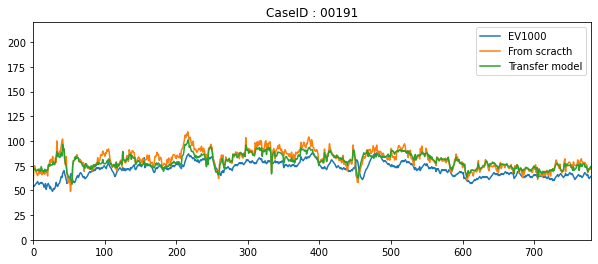

In [ ]:
for chart in np.unique(charts_test):
    case_origin = simple_cnn_result[charts_test == chart]
    case_transfer = transfer_model_result[charts_test == chart]
    case_target = ylabel_test[charts_test == chart]
    
    plt.figure(figsize=(10, 4))
    plt.xlim([0, len(case_target)])
    plt.ylim([0, 220])
    plt.plot(np.arange(0, len(case_target)), case_target,
             label='EV1000')
    plt.plot(np.arange(0, len(case_origin)), case_origin,
             label='From scracth')
    plt.plot(np.arange(0, len(case_transfer)), case_transfer,
             label='Transfer model')
    plt.legend(loc='upper right')
    # plt.text(0.5, 145, loa_textstr, fontsize=10)
    plt.title('CaseID : {}'.format(chart))
    plt.show()